Author:   


**@BayuArdiyansyah - SlRazer
19/03/2024 (IDN)**

Program: Machine Learning by DBD


Email: bayuardi30@outlook.com


In [ ]:
import tensorflow as tf

print(tf.__version__)

2.15.0


Source: https://drive.google.com/drive/folders/17bCWHhNcJK_HSqyK8wpDBVec9dA4eqOg?usp=drive_link

#**IMPORTING FILE FROM GOOGLEDRIVE + UNZIP FILE**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!unzip "/content/gdrive/My Drive/SourceDBD/rockpaperscissors.zip"

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

# **TRAIN SET & VALIDATION SET , dan AUGMENTASI GAMBAR**

In [ ]:
!pip install split-folders

In [ ]:
#import split folder
import splitfolders
folder = '/content/rockpaperscissors'
splitfolders.ratio(folder, output = 'dataset',
                   seed = 1337, ratio = (.6, .4))

Copying files: 2189 files [00:00, 2645.34 files/s]


In [ ]:
# Direktori tempat data disimpan setelah diekstrak
base_dir = '/content/rockpaperscissors/'

In [ ]:
import os
from sklearn.model_selection import train_test_split

# Direktori untuk gambar-gambar batu
rock_dir = os.path.join(base_dir, 'rock')
# Direktori untuk gambar-gambar kertas
paper_dir = os.path.join(base_dir, 'paper')
# Direktori untuk gambar-gambar gunting
scissors_dir = os.path.join(base_dir, 'scissors')
# Direktori untuk training data
train_dir  = os.path.join(base_dir,'training data')
# Direktori untuk validation data
validation_dir  = os.path.join(base_dir, 'validation data')

In [ ]:
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [ ]:
# Membagi data batu menjadi data latih dan validasi dengan rasio 60:40
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4)
# Membagi data kertas menjadi data latih dan validasi dengan rasio 60:40
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4)
# Membagi data gunting menjadi data latih dan validasi dengan rasio 60:40
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.4)

In [ ]:
from shutil import copyfile

# Pindah  gambar ke dalam folder set pelatihan dan validasi
def copy_images(file_names, source_dir, dest_dir):
    """
    Fungsi untuk menyalin file gambar dari direktori sumber ke direktori tujuan.

    Parameters:
    - file_names: List nama file gambar yang akan disalin.
    - source_dir: Direktori sumber tempat file gambar awal berada.
    - dest_dir: Direktori tujuan tempat file gambar akan disalin.
    """
    # Membuat direktori tujuan jika belum ada
    os.makedirs(dest_dir, exist_ok=True)

    # Menyalin file gambar dari sumber ke tujuan
    for file_name in file_names:
        source = os.path.join(source_dir, file_name)
        dest = os.path.join(dest_dir, file_name)
        copyfile(source, dest)

# Menyalin file-file gambar untuk data latih batu ke direktori train/rock
copy_images(train_rock_dir, rock_dir, os.path.join(train_dir, 'rock'))
# Menyalin file-file gambar untuk data latih kertas ke direktori train/paper
copy_images(train_paper_dir, paper_dir, os.path.join(train_dir, 'paper'))
# Menyalin file-file gambar untuk data latih gunting ke direktori train/scissors
copy_images(train_scissors_dir, scissors_dir, os.path.join(train_dir, 'scissors'))
# Menyalin file-file gambar untuk data validasi batu ke direktori val/rock
copy_images(val_rock_dir, rock_dir, os.path.join(validation_dir, 'rock'))
# Menyalin file-file gambar untuk data validasi kertas ke direktori val/paper
copy_images(val_paper_dir, paper_dir, os.path.join(validation_dir, 'paper'))
# Menyalin file-file gambar untuk data validasi gunting ke direktori val/scissors
copy_images(val_scissors_dir, scissors_dir, os.path.join(validation_dir, 'scissors'))

Ukuran validation diset 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel). Implementasi augmentasi gambar dan data generator.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat objek ImageDataGenerator untuk pelatihan dan validasi
# Menambahkan augmentasi gambar pada data pelatihan

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    validation_split = 0.4,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)
# Membuat generator untuk set pelatihan dan validasi
train_generator = train_datagen.flow_from_directory(
      train_dir,  # direktori data latih
      target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
      batch_size=30,
      class_mode='categorical',
      subset ='training')

print('Total sampel Training:', train_generator.samples)

validation_generator = train_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=30,
        class_mode='categorical',
        subset ='validation')

print('Total sampel validasi:', validation_generator.samples)

Found 1314 images belonging to 3 classes.
Total sampel Training: 1314
Found 874 images belonging to 3 classes.
Total sampel validasi: 874


# **DEFINING THE MODEL ARCHITECTURE**

In [ ]:
import tensorflow as tf

# Mendefinisikan model sequential untuk jaringan saraf konvolusi (CNN).
model = tf.keras.models.Sequential([
    # Layer konvolusi pertama dengan 32 filter 3x3, fungsi aktivasi ReLU, dan input berukuran 150x150 dengan 3 channel warna (RGB).
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),

    # Layer pooling pertama dengan ukuran pool 2x2.
    tf.keras.layers.MaxPooling2D(2, 2),

    # Layer konvolusi kedua dengan 64 filter 3x3 dan fungsi aktivasi ReLU.
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),

    # Layer pooling kedua dengan ukuran pool 2x2.
    tf.keras.layers.MaxPooling2D(2,2),

    # Layer konvolusi ketiga dengan 128 filter 3x3 dan fungsi aktivasi ReLU.
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),

    # Layer pooling ketiga dengan ukuran pool 2x2.
    tf.keras.layers.MaxPooling2D(2,2),

    # Layer konvolusi keempat dengan 512 filter 3x3 dan fungsi aktivasi ReLU.
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),

    # Layer pooling keempat dengan ukuran pool 2x2.
    tf.keras.layers.MaxPooling2D(2,2),

    # Mengubah output ke dalam satu dimensi (flatten) untuk disiapkan sebagai input untuk layer Dense.
    tf.keras.layers.Flatten(),

    # Layer Dense dengan 512 neuron dan fungsi aktivasi ReLU.
    tf.keras.layers.Dense(512, activation='relu'),

    # Layer output dengan 3 neuron (sesuai dengan jumlah kelas yang diinginkan) dan fungsi aktivasi softmax untuk klasifikasi multi-kelas.
    tf.keras.layers.Dense(3, activation='softmax')
])

# Catatan: Model ini digunakan untuk klasifikasi gambar dengan tiga kelas.
# Mengapa demikian? hal ini dikarenakan kita menggunakan fungsi softmax pada lapisan output, luaran model akan berupa distribusi probabilitas untuk setiap kelas.



Source teoritis rujukan


[ARTIFICIAL NEURAL NETWORK by BINUS](https://socs.binus.ac.id/2018/07/17/ann3/)

[DEEP LEARNING - INDONESIAN (MEDIUM)](https://medium.com/@samuelsena/pengenalan-deep-learning-8fbb7d8028ac)

[Loss Functions and Optimizers in ML models - MEDIUM](https://medium.com/geekculture/loss-functions-and-optimizers-in-ml-models-b125871ff0dc)

In [ ]:
# Cek Arsitektur Model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

# COMPILING THE MODEL

Loss Functions and Optimizers, yg dipakai:

*   Cross-Entropy, fungsi kerugian ini banyak digunakan untuk masalah klasifikasi. Fungsi ini mengukur ketidaksesuaian antara distribusi probabilitas yang diprediksi dan distribusi probabilitas sebenarnya - Loss Functions
*   Adam adalah metode yang lebih modern dan biasanya lebih cepat konvergennya dibandingkan SGD. Adam mengadaptasi laju pembelajaran untuk setiap parameter, yang bisa sangat membantu jika memiliki masalah dengan skala fitur yang sangat berbeda - Optimizers

In [ ]:
# Kompilasi model dengan fungsi kerugian yang sesuai (categorical_crossentropy)
# dan optimizer Adam
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# **MODEL TRAINING**

In [ ]:
# Definisi kelas callback untuk menghentikan pelatihan
class Limit(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Jika akurasi pelatihan lebih dari 95%, hentikan pelatihan
        if logs.get('accuracy') > 0.95:
            print("\nTraining accuracy reached above 95%. Stopping training.")
            self.model.stop_training = True

# Membuat instance dari kelas Limit
limit_callback = Limit()

In [ ]:
# Melatih model dengan data yang diberikan
History = model.fit(
    train_generator, # Generator data pelatihan
    steps_per_epoch=train_generator.samples // train_generator.batch_size, # Jumlah langkah per epoch
    epochs=20, # Jumlah epoch untuk pelatihan
    validation_data=validation_generator, # Generator data validasi
    validation_steps=validation_generator.samples // validation_generator.batch_size, # Jumlah langkah validasi per epoch
    verbose=1, # Mode verbose untuk menampilkan output pelatihan
    callbacks=[limit_callback] # Daftar callback yang digunakan selama pelatihan
)

Epoch 1/20
43/43 [==============================] - 150s 3s/step - loss: 1.0751 - accuracy: 0.4416 - val_loss: 0.8352 - val_accuracy: 0.5839
Epoch 2/20
43/43 [==============================] - 134s 3s/step - loss: 0.4557 - accuracy: 0.8349 - val_loss: 0.4281 - val_accuracy: 0.8356
Epoch 3/20
43/43 [==============================] - 144s 3s/step - loss: 0.2975 - accuracy: 0.8824 - val_loss: 0.2549 - val_accuracy: 0.9046
Epoch 4/20
43/43 [==============================] - 145s 3s/step - loss: 0.1971 - accuracy: 0.9291 - val_loss: 0.3218 - val_accuracy: 0.9092
Epoch 5/20
43/43 [==============================] - ETA: 0s - loss: 0.1431 - accuracy: 0.9517
Training accuracy reached above 95%. Stopping training.
43/43 [==============================] - 125s 3s/step - loss: 0.1431 - accuracy: 0.9517 - val_loss: 0.1759 - val_accuracy: 0.9598


# **MODEL EVALUATION AND VISUALIZATION**

In [ ]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

print("======================================")

score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

44/44 [==============================] - 33s 748ms/step - loss: 0.1123 - accuracy: 0.9650
Loss: 0.1123
Accuracy: 0.9650
30/30 [==============================] - 22s 707ms/step - loss: 0.1666 - accuracy: 0.9519
Loss: 0.1666
Accuracy: 0.9519


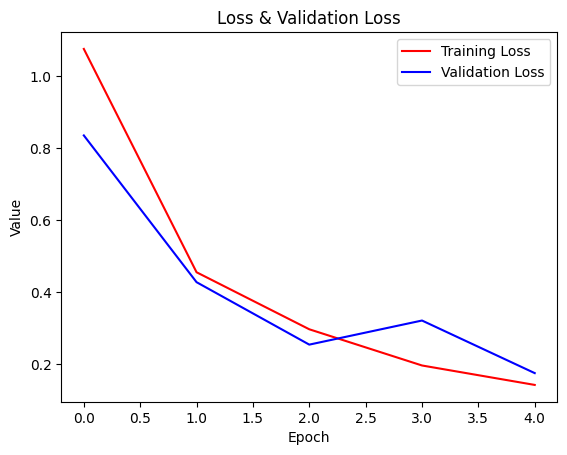

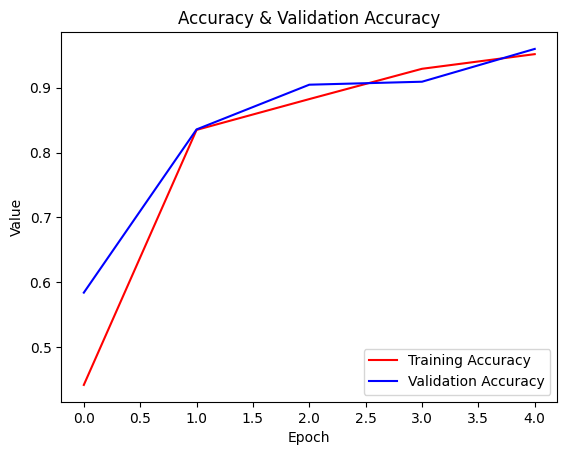

In [ ]:
import matplotlib.pyplot as plt

# plot loss train & validation
plt.plot(History.history['loss'], 'r', label='Training Loss')
plt.plot(History.history['val_loss'], 'b', label='Validation Loss')
plt.title('Loss & Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

# plot accuracy train & validation
plt.plot(History.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(History.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Accuracy & Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

# **Model Evaluation using Classification Report and Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics

# Melakukan prediksi kelas untuk data validasi menggunakan model yang telah dibuat
Y_pred = model.predict(validation_generator, train_generator.samples // train_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

# Menampilkan matriks kebingungan (confusion matrix) yang memberikan gambaran performa model
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
confusion_array = sklearn.metrics.confusion_matrix(validation_generator.classes, y_pred)

# Menampilkan nilai True Negatives, False Negatives, True Positives, dan False Positives
print('True Negative = ', confusion_array[0,0])
print('False Negative = ', confusion_array[1,0])
print('True Positive = ', confusion_array[1,1])
print('False Positive = ', confusion_array[0,1])

30/30 [==============================] - 23s 766ms/step
Confusion Matrix
[[ 96  99  89]
 [ 93 100  97]
 [112  90  98]]
True Negative =  96
False Negative =  93
True Positive =  100
False Positive =  99


In [ ]:
# Menampilkan laporan klasifikasi yang memberikan informasi tentang presisi, recall, dan f1-score untuk setiap kelas
print('Classification Report')
target_names = ['Paper', 'Rock', 'Scissors']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       Paper       0.32      0.34      0.33       284
        Rock       0.35      0.34      0.35       290
    Scissors       0.35      0.33      0.34       300

    accuracy                           0.34       874
   macro avg       0.34      0.34      0.34       874
weighted avg       0.34      0.34      0.34       874



In [ ]:
# Membuat DataFrame untuk menyimpan evaluasi model
import pandas as pd

evaluation = pd.DataFrame({'Model': [],
                           'Data_Train': [],
                           'Data_Valid': [],
                           'Epochs': [],
                           'Batch_Size': [],
                           'Loss': [],
                           'Akurasi': []
})

# Menambahkan metrik evaluasi ke dalam DataFrame
r = evaluation.shape[0]
evaluation.loc[r] = ['CNN', train_generator.n, validation_generator.n, 20, train_generator.samples // train_generator.batch_size, score[0], score[1]]
evaluation

,Model,Data_Train,Data_Valid,Epochs,Batch_Size,Loss,Accuracy
0,CNN,1314,874,20,43,0.166614,0.951945


# **IMAGE PREDICTION EXECUTION**

In [ ]:
train_generator.class_indices

validation_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
1/1 [==============================] - 0s 49ms/step
Gambar adalah scissors


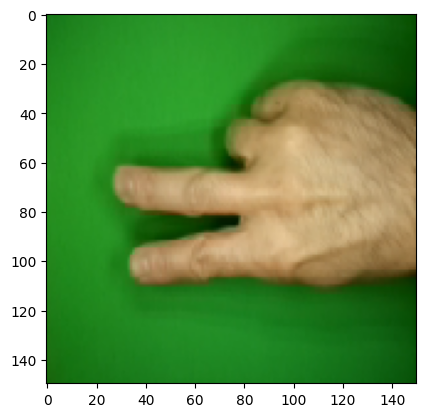

In [ ]:
from google.colab import drive
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Menghubungkan Google Drive
drive.mount('/content/gdrive')

# Mengunggah gambar dari Google Drive
img_path = '/content/gdrive/My Drive/SourceDBD/Gunting.png'
img = image.load_img(img_path, target_size=(150, 150))

# Praproses gambar
imgplot = plt.imshow(img)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

# Melakukan prediksi
img_array = np.vstack([img_array])
prediction = model.predict(img_array, batch_size=32)

# Menampilkan hasil prediksi
if prediction[0][0] == 0:
    print("Gambar adalah paper ")
elif prediction[0][1] > 1:
    print("Gambar adalah rock")
else:
    print("Gambar adalah scissors")